# <font color=#0000ff>Transformada Discreta de Fourier</font>

Lembrando que se $x(n)$ é  um sinal no tempo de discreto e aperiódico, sua Transformada de Fourier é dada por
$$
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty}x[n]e^{-j\omega n}
$$
e a  inversa 
$$
x(n) = \frac{1}{2\pi}\int_{2\pi}X(e^{j\omega})e^{j\omega n}d\omega
$$
$X(e^{j\omega})$ é uma função contínua de $\omega$.

**Exemplo:** Seja o sinal
$$
x(n) = \left\{ 
\begin{array}{c c}
1, & 0 \leq n < L \\ 0, & c.c.
\end{array}
\right.
$$
qu é limitado no tempo com apenas $L$ valores constantes e não nulos. Calculando a Transformada de Fourier para $L=8$ obtemos
$$
X(e^{j\omega}) = \frac{e^{-j8\omega} - 1}{e^{-j\omega} - 1}
$$
cujo módulo está representado na Figura abaixo

![ModuloEspetroPortaDiscreta](Figuras/ModuloEspetroPortaDiscreta.png)


Que é uma função contínua de $\omega$, e para realizar a análise espectral usando um processador digital, devemos amostrá-la, e portanto a primeira questão é quantas amostras devemos usar.

Por exemplo, se escolhermos $N = 8$, vamos amostras tomar nas frequências $\omega_k = 2\pi k/N$ e obteremos a representação:

![ModuloEspetroPortaDiscreta_SampledN8](Figuras/ModuloEspetroPortaDiscreta_SampledN8.png)

Os pontos em vermelho representam as amostras, e agora passamos a ter uma sequência de $N$ valores, que é a Transformada Discreta de Fourier (DFT - *Discrete Fourier Transform*) do sinal.

Em essência, a DFT é um apeamento da representação do sinal no tempo discreto para o espectro discreto.

Podemos escrever
$$
X[k] = X(e^{j\omega})|_{\omega=\frac{2\pi k}{N}},\ k=0,1,2,..., N-1
$$
e como $X(e^{j\omega})$ é periódica, basta amostrar um período de $2\pi$.

Estamos considerando que o sinal $x(n)$ tem comprimento $L$ ($x[n] = 0$ para $n < 0 $ e $N\geq L$), se escolhermos tomar $N$ amostas do espectro temos
$$
X[k] = X(e^{j\frac{2\pi k}{N}}) = \sum\limits_{n=0}^{N-1}x[n]e^{-j\frac{2\pi k}{N}n}
$$
ou ainda como
$$
X[k] =\left\{ \begin{array}{c c} \sum\limits_{n=0}^{N-1}x[n]W_N^{kn} & k = 0,1, ..., N-1 \\
0, & c.c
\end{array}
\right.
$$
e
$$
x[n] = \left\{ \begin{array}{c c} \frac{1}{N}\sum\limits_{k=0}^{N-1}X[k]W_{N}^{-kn}, & n = 0,1,...,N-1 \\ 0, & c.c.  \end{array}\right.
$$
sendo $W_N = e^{-j\frac{2\pi}{N}}$.


O sinal $x[n]$ obtido a partir da transformada inversa tem $n = 0, ..., N-1$ posições, e consideramos que para $n \geq N$, $x(n) = 0$. 
<p>
Entretanto na inversa aparece $W_N$ que é uma função periódica com período $N$, logo a sequência recuperada no tempo discreta será periódica com período $N$, por isso é necessário limitá-la nos primeiros $N$ pontos.
    <p>
Outro fator a se destacar é que originalmente o sinal $x(n)$ tem $L$ valores e na definição de $X[k]$ foi utilizada a variável $N$ que pode ser diferente de $L$.

- O parâmetro $N$ é o passo que a função $H(e^{j\omega})$ será amostrada, ou seja, como o intervalo $2\pi$ será dividida ($2\pi/N$);
<p>
-Ao aplicar a transformada inversa em $X(k)$ se obtém um sinal $\hat{x}(n)$ que é periódico cujos valores se repetem a cada $N$;
<p>
-Dessa forma, ao fazer $N>L$, o que implica em tomar além dos $L$ primeiros valores de $x(n)$ outros $N-L$ valores que são zero na equação
$$
X[k] = X(e^{j\frac{2\pi k}{N}}) = \sum\limits_{n=0}^{L-1}x[n]e^{-j\frac{2\pi k}{N}n}
$$
melhorará a representação espectral, pois os intervalos $2\pi/N$ serão menores e assim mais detalhes serão tomados, além do que no tempo as cópias de $x(n)$ em $\hat{x}(n)$ estarão mais espaçadas.
<p>
- O fato de utilizar valores $x(n) = 0$, $L \leq n \leq N-1$ no somatório da Equação acima não contribuirá com novos valores, porém fará com que os valores não nulos quando $0 \leq n \leq < L-1$ seja ponderados por exponenciais $e^{-j\frac{2\pi}{N}}$ menos a medida que $N$ aumenta, modificando assim o valor final de $X(k)$.
<p>
- Assim aumentar o valor de $N$ não traz problema para a representação espectral de $x(n)$, porém implica em mais processamento.

**Exemplo:** Voltemos ao sinal
$$
x[n] =  \left\{ \begin{array}{c c} 1, & n = 0,1,...,8 \\ 0, & c.c.  \end{array}\right.
$$
tem-se
$$
X[k] = \sum_{n=0}^{7}e^{-j(\frac{2\pi k}{8})n} = \frac{ e^{-j2\pi k} - 1}{ e^{-j(2\pi k/8)}-1}
=\left\{\begin{array}{c c}8, & k = 0, \pm8, \pm 16, ... \\ 0, c.c\end{array}\right.
$$

![ModuloEspetroPortaDiscreta_SampledN8valores](Figuras/ModuloEspetroPortaDiscreta_SampledN8valores.png)

- Observe que vários valores não foram registrados.
- Fazendo $N = 16$: $X[k] = \sum_{n=0}^{15}e^{-j(\frac{2\pi 8k}{16})n} = \frac{e^{-j2\pi k} -1}{e^{-j(2\pi k/16)-1}}
$

![ModuloEspetroPortaDiscreta_SampledN16valores](Figuras/ModuloEspetroPortaDiscreta_SampledN16valores.png)

O que acontece se aumentarmos para $N = 32, 64, 128$ ?

### Na frequência

- Vamos observar o caminho inverso, dado um $X(k)$ qual $x(n)$ é obtido pela transformada inversa?
- Tomemos $X(k)$ para sinal retangular dos exemplos anteriores com $L=8$ e $N=8$.
- Aplicando a transformada inversa obtemos
$$
\hat{x}(n) = \frac{1}{8}\sum_{k=0}^{7}X(k)e^{j\frac{2\pi}{N}kn} = \frac{1}{8}.8 = 1.
$$
\item O sinal recuperado $\hat{x}(n)$ é periódico. Porém como $x(n) = \hat{x}(n)$, $0 \leq n < L$ obtem-se o sinal original.
\item Fazendo o mesmo para $N=16$ chega-se a
$$
\hat{x}(n) = \frac{1}{16}\sum_{k=0}^{15}X(k)e^{j\frac{2\pi}{16}kn} 
$$
cujo sinal está representado na Figura abaixo.

![SinalPortaRecuperadoTransformadaDiscretaN16](Figuras/SinalPortaRecuperadoTransformadaDiscretaN16.png)

- Que também é periódico, agora com período $N=16$, do qual se obtém $x(n)$ ao tomar os $L=8$ primeiros valores.

### Representação matricial

Vamos iniciar relembrando que a Transformada Discreta de Fourier (DFT) é uma representação **discreta** do espectro de frequências de sinais no tempo discreto $x(n)$, cuja expressão é dada por:

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn},$$ sendo $W_N = e^{-j\frac{2\pi}{N}}.$

Para um determinado $k$ temos

$$X[k] = x(0)e^{-j\frac{2\pi.k.0}{N}} + x(1)e^{-j\frac{2\pi.k.1}{N}} + ... + x(N-1)e^{-j\frac{2\pi.k.(N-1)}{N}}$$
que pode ser escrita como
$$X[k] = \begin{bmatrix}1 & e^{-j\frac{2\pi.k}{N}} & ... & e^{-j\frac{2\pi.k.(N-1)}{N}}\end{bmatrix}\begin{bmatrix}x(0) \\ x(1) \\ x(2) \\ ... \\ x(N-1)\end{bmatrix}$$
estendendo essa representação pra todos os valore de $k$ obtemos
$${\bf X} = \begin{bmatrix} 1 & 1 & 1 & ... & 1 \\1 & e^{-j\frac{2\pi}{N}} & e^{-j\frac{2\pi.2}{N}} & ... & e^{-j\frac{2\pi.(N-1)}{N}} \\ ... \\ 1 & e^{-j\frac{2\pi(N-1)}{N}} & e^{-j\frac{2\pi.2(N-1)}{N}} & ... & e^{-j\frac{2\pi.(N-1)(N-1)}{N}}\end{bmatrix}\begin{bmatrix} x(0) \\ x(1) \\ ... \\ X(N-1) \end{bmatrix}$$

Vantagem: útil em sistemas baseados em representação matricial, Ex. MATLAB, hardware dedicado.

Desvantagem: Armazenamento da matriz.


Observando o desenvolvimento acima, vemos que para calcular cada valor $X[k]$ são necessários
1. $N$ multiplicações complexas, e
2. $N-1$ adições complexas.


Para obter todos os coeficientes $X[k]$, $k = 0, ..., N-1$ são necessários
1. $N^2$ multiplicações complexas, e
2. $(N-1)N$ adições complexas.

Por isso dizemos que a DFT tem complexidade $O(N^2)$, cujo comportamento está ilustrado no gráfico abaixo.

Text(0, 0.5, '$O(N^2)$')

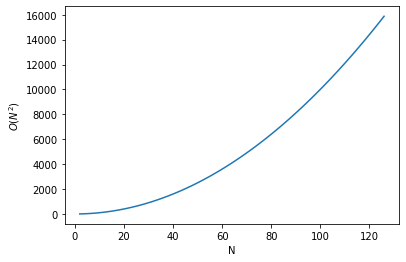

In [3]:
import numpy as np
import matplotlib.pyplot as mplib
N = 128;
n = range(2,N-1)
mplib.plot(n, np.power(n, 2))
mplib.xlabel('N')
mplib.ylabel('$O(N^2)$')

Em 1965, é proposto um algoritmo rápido que reduz a complexidade do calculo da DFT para $O(N.log_2 N)$.

Text(0, 0.5, '$O(\\cdot)$')

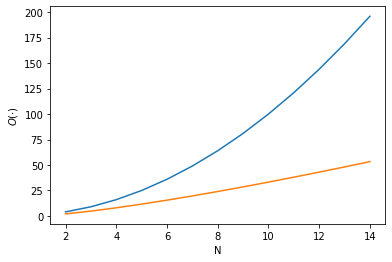

In [6]:
import numpy as np

import matplotlib.pyplot as mplib
N = 16;
n = range(2,N-1)
mplib.plot(n, np.power(n, 2))
mplib.plot(n, n*np.log2(n))
#mplib.legend('(N^2)','N.log_2(N)')
mplib.xlabel('N')
mplib.ylabel('$O(\cdot)$')


Esses algoritmos ficaram conhecidos como **Transformada Rápida de Fourier**, ou simplesmente **FFT** de Fast Fourier Transform.

Antes de avançar, vamos observar o comportamento da quantidade $W_N = e^{-\frac{2\pi}{N}}$, quem tem
1. $|W_N| = 1,\ \forall\ N$,
2. $\angle W_N = atan\left(\frac{2\pi}{N}\right)$.

Pode-se ainda observar que variando o expoente $k$ em $W_N^k$, tem o efeito de dividir o círculo unitário em $N$ partes, como representado a seguir.

![title](./Figuras/Circulo.png)


Outras caracterísiticas são exploradas pelos algoritmos de FFT:

1. Simetria complexa conjugada: $W_N^{k(N-n)} = W_n^{-kn} = (W_N^{kn})^*$, ($()^*$ significa o conjugado complexo), e;
2. Periodicidade em $k$ e $n$: $W_N^{kn} = W_N^{k(N + n)} = W_N^{(k + N)n}$.

E a decomposição de uma DFT de $N$ pontos em DFTs de tamanhos menores.

Classes básicas:
    
1. FFT com decimação no tempo: $x(n)$ é sucessivamente decomposto em sequências menores
2. FFT com decimação em frequência : $X[k]$ é decomposto em sequências menores
    
Algoritmos:
    
1. Goertzel(1958): $O(N^2)$
2. **Cooley-Tukey(1965): Deu origem à decimação no tempo**
3. Sande-Tukey(1966): Deu origem à decimação em frequência


## <font color=#0000ff>FFT por Decimação no tempo</font>

Decomposição sucessiva de $x(n)$ em tamanhos menores, e para tanto se convenciona utilizar $N = 2^l$, sendo $l$ um inteiro positivo.

### Algoritmo Raiz de 2 com decimação no tempo

O sinal $x(n)$ de $N$ pontos é dividido em 2 sequências de $N/2$ pontos, uma relativa aos índices **pares** e outra relativa aos índices **impares**, assim

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn}$$

após a divisão

$$X[k] = \sum\limits_{n\ par}^{N/2-1}x(n)W_N^{kn} + \sum\limits_{n\ ímpar}^{N/2-1}x(n)W_N^{kn}$$

fazendo:
$n = 2r$ para $n$ par, e $n = (2r + 1)$ para $n$ ímpar,

temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)W_N^{k2r} + \sum\limits_{r=0}^{N/2-1}x(2r+1)W_N^{k(2r+1)}$

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_N^2)^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_N^2)^{k r}$

Como $W_N^2 = W_{N/2}$ temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_{N/2})^{k r}$

representando as componentes pares e ímpares de $x(n)$ por

$x_e(n) = x(2n)$, $n = 0, 1, ..., N/2 -1$, e

$x_o(n) = x(2n + 1)$, $n = 0, 1, ..., N/2 -1$

Temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

Vamos chamar:

$X_e[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r}$,e 

$X_o[k] = \sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

cada uma sendo uma DFT de $N/2$ pontos

e

$X[k] = X_e[k] + W_N^kX_o[k]$

sendo $X_e[k] = X_e[k + N/2]$ e $X_o[k] = X_o[k + N/2]$

###  <center><font color=#0000ff> Para $N = 2$ </font></center>

Pelo cálculo da DFT temos:

$X[0] = \sum\limits_{n=0}^{1}x(n)W_2^{0} = x(0) + x(1)$

$X[1] = \sum\limits_{n=0}^{1}x(n)W_2^{1} = x(0) - x(1)$

Usando e FFT temos 

$X[0] = X_e[0] + W_2^0 X_o[0]$

$X[1] = X_e[1] + W_2^1 X_o[1]$
<br>
<br>
nesse caso, como $x(n)$ só tem dois termos $X_e[0] = x_0$ e $X_o[0] = x(1)$, representado na figura a seguir.

![title](./Figuras/FFTN2.png)

###  <center><font color=#0000ff>Para $N = 4$ </font></center>

Pelo cálculo da **DFT** temos:

$X[0] = \sum\limits_{n=0}^{3}x(n)W_4^{0} = x(0) + x(1) + x(2) + x(3) = x(0) + x(2) + x(1) + x(3)$

$X[1] = \sum\limits_{n=0}^{3}x(n)W_4^{n} = x(0) + x(1)W_4^{1}  + x(2)W_4^{2} + x(3)W_4^{3} =  
x(0) - x(2) -j[x(1) - x(3)]$

$X[2] = \sum\limits_{n=0}^{3}x(n)W_4^{2n} = x(0) + x(1)W_4^{2} + x(2)W_4^{4} + x(3)W_4^{6} = x(0) + x(2) -[x(1) + x(3)]$

$X[3] = \sum\limits_{n=0}^{3}x(n)W_4^{3n} = x(0) + x(1)W_4^{3} + x(2)W_4^{6} + x(3)W_4^{9} = x(0) - x(2) + j[x(1) - x(3)]$


Usando e **FFT** temos 

$X[0] = X_e[0] + W_4^0 X_o[0] $ 

$X[1] = X_e[1] + W_4^1 X_o[1]$ 

$X[2] = X_e[2] + W_4^2 X_o[2] = X_e[0] + W_4^2 X_o[0]$      <font color = "0000ff"> Devido a simetria $X[k + N/2] = X[k]$</font>

$X[2] = X_e[3] + W_4^3 X_o[3] = X_e[1] + W_4^2 X_o[1]$       <font color = "0000ff"> Devido a simetria $X[k + N/2] = X[k]$</font>
<br>
<br>
Observe que $X_e[0] = \sum\limits_{n=0}^{1}x(n)W_{N}^{kn}$ sendo esse $n$ os índices pares de $x(n)$, ou seja $x(0)$ e $x(2)$, o mesmo valendo para $X_o[k]$ que é composta pelos índices ímpares.

![title](./Figuras/TrelicaFFTN4.png)

Observando as duas estruturas acima, vemos que para uma FFT de tamanho $N$, são necessários $\log_2(N)$ estágios, e em cada estágio, a partir dos valores do sinal, são realizadas DFTs de tamanhos $2, 4, 8, ..., N$.

Para o primeiro estágio, FFT de tamanho $N_1 = 2$, no cômputo de $X_e[k]$ $k = 0, 1$ usa-se as posições de entrada 0 (quen contém $x(0)$) e 1 (que contém $x(2)$), já $X_o[k]$ usa as posições 2 (que contém $x(1)$) e 3 (que contém $x(3)$), houve um deslocamento de $N_1/2$ na posições de entrada.

No segundo estágio, FFTs de tamanho $N_2 = 4$ e nesse caso já o resultado da FFT, $X[k],\ k = 0,1 2,3$ para cada $k$, envolve as **posições anteriores** $k$ e $(k+ N_2/2) mod\ N_2$

###  <center><font color=#0000ff>  N = 8 </font></center>

Para $N = 8$ vamos usar a borboleta otimizada mostrada na Figura abaixo 

Sendo 

$X_m[p] = X_{m-1}[p] + W_N^rX_{m-1}[q]$

$X_m[q] = X_{m-1}[p] - W_N^r X_{m-1}[q]$

Precisamos avaliar como variam $m$, $p$, $q$ e $r$. Inicialmente, vamos atribuir os valore do sinal $x(n)$ ao estágio inicial da treliça, usando a sequência obtida pela inversão da ordem dos bits dos índices de $x(n)$, ou seja:

$X_0[0] = x(0)$

$X_0[1] = x(4)$

$X_0[2] = x(2)$

$X_0[3] = x(6)$

$X_0[4] = x(1)$

$X_0[5] = x(5)$

$X_0[6] = x(3)$

$X_0[7] = x(7)$

e representara a treliça, que tem $log_2(N)$ estágios, no para $N = 8$ teremos 3 estágios, qu estão representados a seguir.

![title](./Figuras/FFTN8peq.png)

Repetindo a treliça apresentando somente os valore de $p$ e $q$ em cada estágio.

**Questão:** Como implementar um código para um $N$ qualquer?

In [1]:
import numpy as np
#PRÉ-DEFINIÇÕES:
N = 8                                   # Tamanho da FFT
x = [1, 1, 1, 1, 1, 1, 1, 1] #[0,1,0,0,0,0,0,0]                   # Entrada da FFT 
etapas = np.arange(1,int(np.log2(N))+1) # Etapas necessárias para FFT
XM=np.zeros((len(etapas)+1,N))          # Vetor que percorre as etapas da FFT
#print(XM)
# Função que calcula o bit reverso:
def revbits(x):
    return int(bin(x)[2:].zfill(len(etapas))[::-1], 2)

# Definição da sequência do vetor de entradas para FFT:
for k in range(N):
  XM[0,k] = x[revbits(k)]
  #print(revbits(k))


for m in etapas:
  Nk = 2**m                                   # Nk = Tamanho da FFT na etapa m
  print('Etapa nº',m,'(',int(N/Nk),'FFTs de N =',Nk,')')
  for k in range(int(N/Nk)):                  # N/Nk = Número de FFTs de tamanho Nk realizadas
    print(' FFT',k,'da etapa',m,'( N =',Nk,')')
    rep = 2**(m-1)                            # rep = Repetições de p para cada FFT
    p = k*Nk
    for kp in range(rep):
      print('   Repetição', kp,'( p =',p,') da FFT',k,'( N =',Nk,')')
      q = p+2**(m-1)
      m_1 = m-1
      print('p = ', p)
      print('q = ', q)
      r = np.log2(Nk)-1#(Nk/2)**m  
      print('r = ', r) #segundo p.438 do 
      W = np.cos(2*np.pi*r/N) - 1j*np.sin(2*np.pi*r/N)
      print('m= ',XM[m_1,q])
      XM[m,p] = XM[m_1,p] + W*XM[m_1,q]
      XM[m,q] = XM[m_1,p] - W*XM[m_1,q]
      p = p + 1
      #print('\n TMP = \n',XM)
print('\n RESPOSTA = \n',XM)

Etapa nº 1 ( 4 FFTs de N = 2 )
 FFT 0 da etapa 1 ( N = 2 )
   Repetição 0 ( p = 0 ) da FFT 0 ( N = 2 )
p =  0
q =  1
r =  0.0
m=  1.0
 FFT 1 da etapa 1 ( N = 2 )
   Repetição 0 ( p = 2 ) da FFT 1 ( N = 2 )
p =  2
q =  3
r =  0.0
m=  1.0
 FFT 2 da etapa 1 ( N = 2 )
   Repetição 0 ( p = 4 ) da FFT 2 ( N = 2 )
p =  4
q =  5
r =  0.0
m=  1.0
 FFT 3 da etapa 1 ( N = 2 )
   Repetição 0 ( p = 6 ) da FFT 3 ( N = 2 )
p =  6
q =  7
r =  0.0
m=  1.0
Etapa nº 2 ( 2 FFTs de N = 4 )
 FFT 0 da etapa 2 ( N = 4 )
   Repetição 0 ( p = 0 ) da FFT 0 ( N = 4 )
p =  0
q =  2
r =  1.0
m=  2.0
   Repetição 1 ( p = 1 ) da FFT 0 ( N = 4 )
p =  1
q =  3
r =  1.0
m=  0.0
 FFT 1 da etapa 2 ( N = 4 )
   Repetição 0 ( p = 4 ) da FFT 1 ( N = 4 )
p =  4
q =  6
r =  1.0
m=  2.0
   Repetição 1 ( p = 5 ) da FFT 1 ( N = 4 )
p =  5
q =  7
r =  1.0
m=  0.0
Etapa nº 3 ( 1 FFTs de N = 8 )
 FFT 0 da etapa 3 ( N = 8 )
   Repetição 0 ( p = 0 ) da FFT 0 ( N = 8 )
p =  0
q =  4
r =  2.0
m=  3.414213562373095
   Repetição 1 ( p = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
